#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth =True

set_session(tf.Session(config=config)) 

# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層2與池化層2

In [14]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

def show_train_history_loss(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'val_loss'], loc='upper left')
    plt.show()

In [24]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [26]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 13s 355us/step - loss: 0.0894 - acc: 0.1416 - val_loss: 0.0893 - val_acc: 0.1820
Epoch 2/12
37500/37500 [==============================] - 13s 349us/step - loss: 0.0892 - acc: 0.1484 - val_loss: 0.0892 - val_acc: 0.1854
Epoch 3/12
37500/37500 [==============================] - 13s 349us/step - loss: 0.0892 - acc: 0.1515 - val_loss: 0.0892 - val_acc: 0.1953
Epoch 4/12
37500/37500 [==============================] - 13s 346us/step - loss: 0.0890 - acc: 0.1567 - val_loss: 0.0891 - val_acc: 0.1974
Epoch 5/12
37500/37500 [==============================] - 13s 350us/step - loss: 0.0889 - acc: 0.1635 - val_loss: 0.0890 - val_acc: 0.2026
Epoch 6/12
37500/37500 [==============================] - 13s 348us/step - loss: 0.0888 - acc: 0.1659 - val_loss: 0.0889 - val_acc: 0.2066
Epoch 7/12
37500/37500 [==============================] - 13s 346us/step - loss: 0.0886 - acc: 0.1722 - val_loss: 0.

Use MSE as loss function


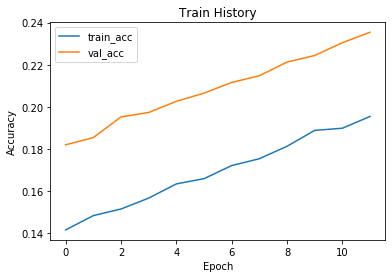

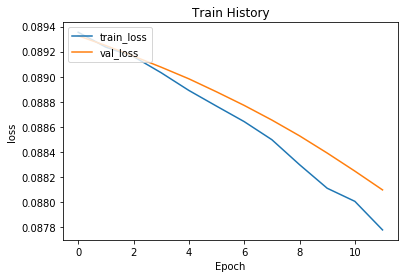

In [27]:
print("Use MSE as loss function")
show_train_history('acc','val_acc')
show_train_history_loss("loss","val_loss")

In [31]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 188us/step

accuracy= 0.8999999761581421


In [32]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [33]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 14s 370us/step - loss: 0.3106 - acc: 0.9000 - val_loss: 0.3111 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 13s 354us/step - loss: 0.3054 - acc: 0.9000 - val_loss: 0.3063 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 13s 353us/step - loss: 0.2998 - acc: 0.9002 - val_loss: 0.3020 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 13s 355us/step - loss: 0.2955 - acc: 0.9003 - val_loss: 0.2981 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 14s 361us/step - loss: 0.2923 - acc: 0.9005 - val_loss: 0.2953 - val_acc: 0.9001
Epoch 6/12
37500/37500 [==============================] - 13s 360us/step - loss: 0.2900 - acc: 0.9007 - val_loss: 0.2932 - val_acc: 0.9001
Epoch 7/12
37500/37500 [==============================] - 13s 354us/step - loss: 0.2881 - acc: 0.9008 - val_loss: 0.

Use binary_crossentropy as loss function


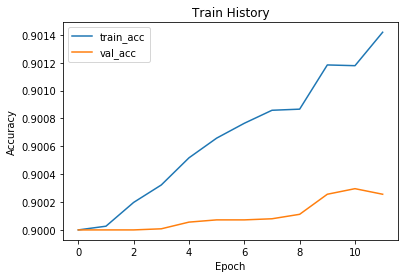

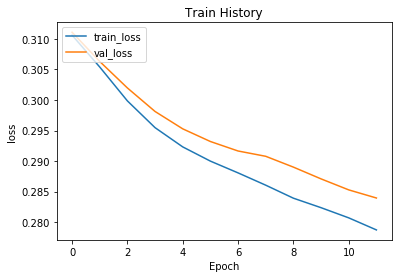

In [35]:
print("Use binary_crossentropy as loss function")
show_train_history('acc','val_acc')
show_train_history_loss("loss","val_loss")

In [36]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 175us/step

accuracy= 0.9003499774932862
